# Library

In [1]:
!pip install yfinance

In [3]:
# Basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Yahoo Finance
import yfinance as yf
import datetime

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras

# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Surpress warning
import warnings
warnings.filterwarnings("ignore")

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get Data

In [4]:
# Get BBCA Data
startDate = datetime.datetime(2016, 1, 1)
endDate = datetime.datetime(2023, 1, 1)
BBCA = yf.download('BBCA.JK', start=startDate, end=endDate)
BBCA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2635.0,2685.0,2630.0,2645.0,2337.201172,77479500
2016-01-05,2640.0,2710.0,2640.0,2675.0,2363.709473,96609000
2016-01-06,2665.0,2700.0,2640.0,2640.0,2332.781982,105370000
2016-01-07,2620.0,2630.0,2600.0,2600.0,2297.437500,146746500
2016-01-08,2590.0,2620.0,2590.0,2600.0,2297.437500,125820000
...,...,...,...,...,...,...
2022-12-26,8500.0,8625.0,8500.0,8575.0,8406.959961,20495900
2022-12-27,8600.0,8650.0,8575.0,8600.0,8431.469727,27193800
2022-12-28,8650.0,8650.0,8550.0,8650.0,8480.490234,40420200


In [5]:
# Convert to dataframe
df = pd.DataFrame(BBCA)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2635.0,2685.0,2630.0,2645.0,2337.201172,77479500
2016-01-05,2640.0,2710.0,2640.0,2675.0,2363.709473,96609000
2016-01-06,2665.0,2700.0,2640.0,2640.0,2332.781982,105370000
2016-01-07,2620.0,2630.0,2600.0,2600.0,2297.437500,146746500
2016-01-08,2590.0,2620.0,2590.0,2600.0,2297.437500,125820000
...,...,...,...,...,...,...
2022-12-26,8500.0,8625.0,8500.0,8575.0,8406.959961,20495900
2022-12-27,8600.0,8650.0,8575.0,8600.0,8431.469727,27193800
2022-12-28,8650.0,8650.0,8550.0,8650.0,8480.490234,40420200


# EDA

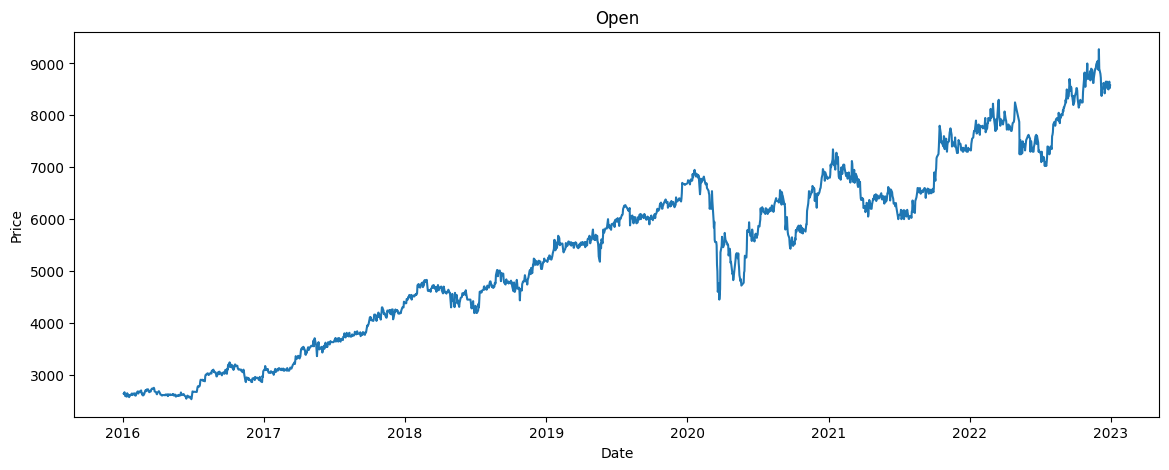

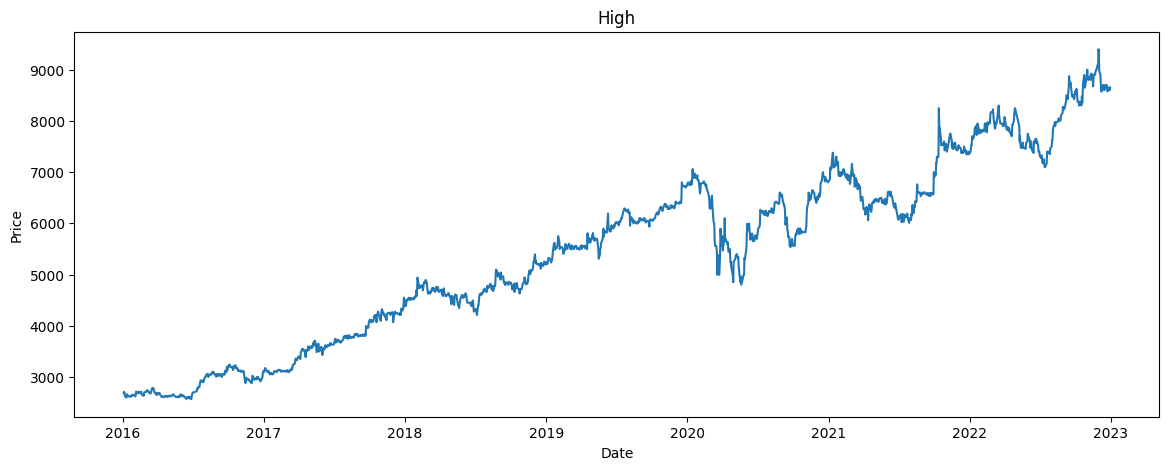

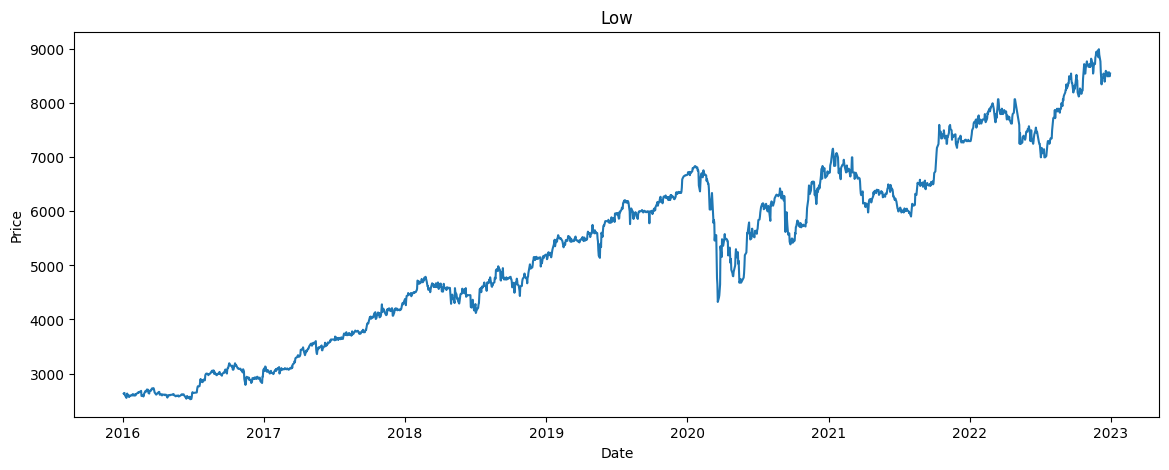

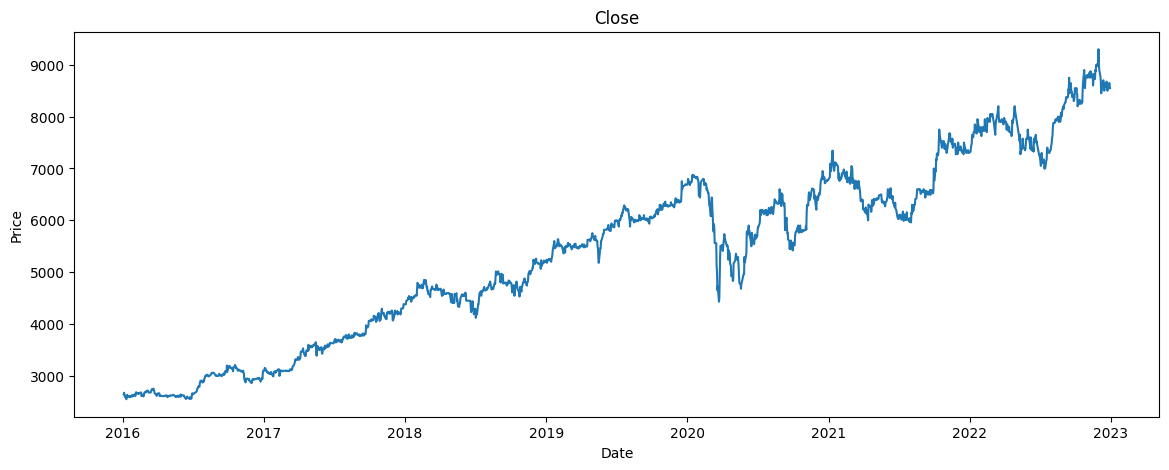

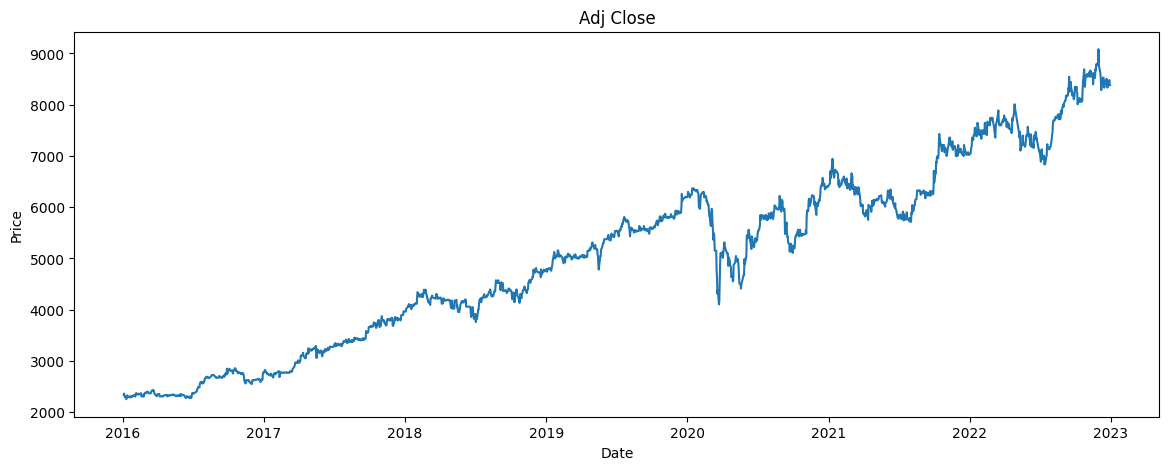

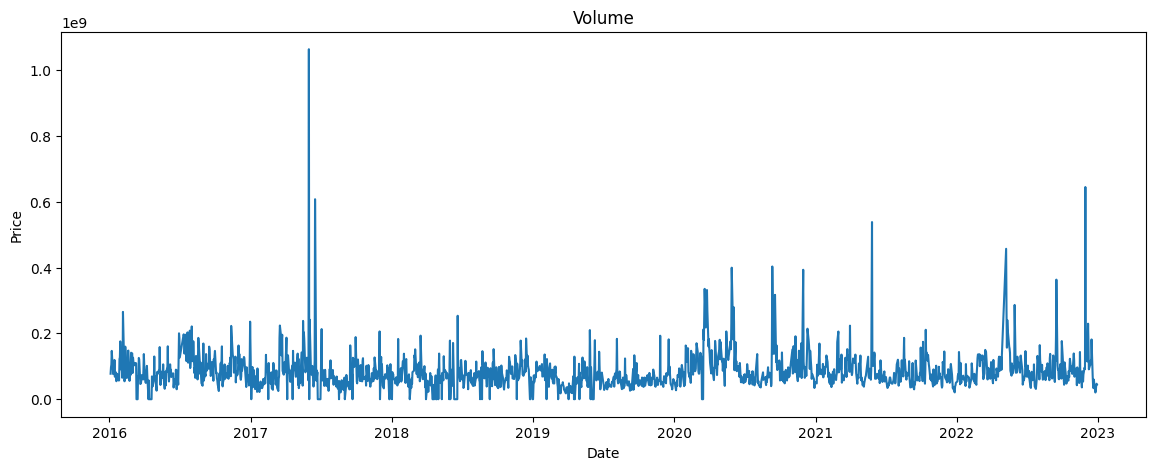

In [6]:
# Plot the each column of dataframe
for i in range(len(df.columns)):
    plt.figure(figsize=(14, 5))
    plt.plot(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()


# Splitting Dataset

In [7]:
# Split the data into training and validation set
# 80% training, 20% validation
train_size = int(len(df) * 0.8)
valid_size = len(df) - train_size

# Split the data into training and validation set
train, valid = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Print the shape of training and validation set
print(train.shape, valid.shape)

(1403, 6) (351, 6)


In [8]:
# Check the train data
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2635.0,2685.0,2630.0,2645.0,2337.201172,77479500
2016-01-05,2640.0,2710.0,2640.0,2675.0,2363.709473,96609000
2016-01-06,2665.0,2700.0,2640.0,2640.0,2332.781982,105370000
2016-01-07,2620.0,2630.0,2600.0,2600.0,2297.437500,146746500
2016-01-08,2590.0,2620.0,2590.0,2600.0,2297.437500,125820000
...,...,...,...,...,...,...
2021-07-27,6005.0,6060.0,6000.0,6005.0,5756.590332,53107500
2021-07-28,6005.0,6010.0,5970.0,5980.0,5732.625000,74133000
2021-07-29,6055.0,6085.0,5980.0,6040.0,5790.143066,84605000


In [9]:
# Check the test data
valid

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-03,6025.0,6180.0,5985.0,6145.0,5890.799805,110071500
2021-08-04,6145.0,6150.0,6060.0,6120.0,5866.833496,41112000
2021-08-05,6170.0,6310.0,6140.0,6300.0,6039.387695,93768000
2021-08-06,6360.0,6360.0,6135.0,6160.0,5905.178711,67285000
2021-08-09,6135.0,6200.0,6105.0,6200.0,5943.523926,52858500
...,...,...,...,...,...,...
2022-12-26,8500.0,8625.0,8500.0,8575.0,8406.959961,20495900
2022-12-27,8600.0,8650.0,8575.0,8600.0,8431.469727,27193800
2022-12-28,8650.0,8650.0,8550.0,8650.0,8480.490234,40420200


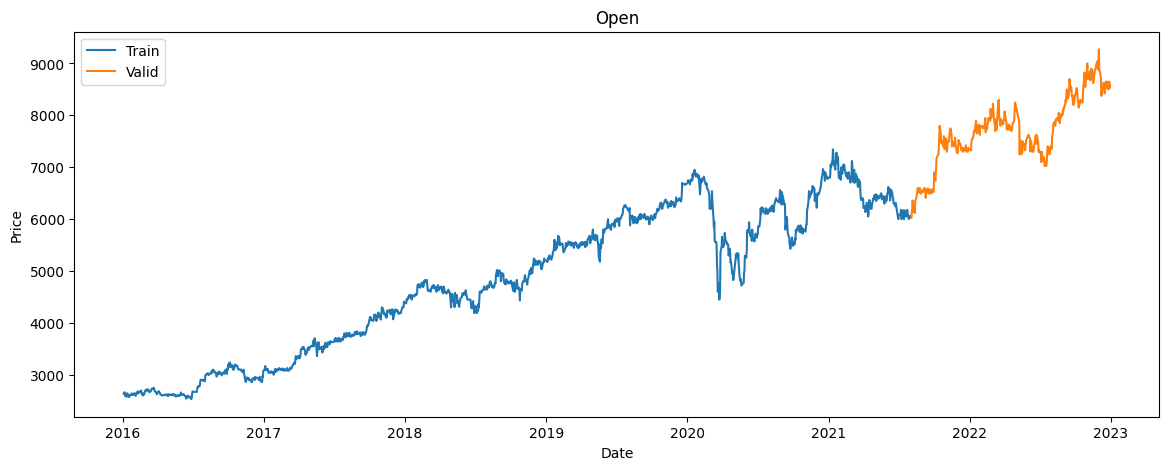

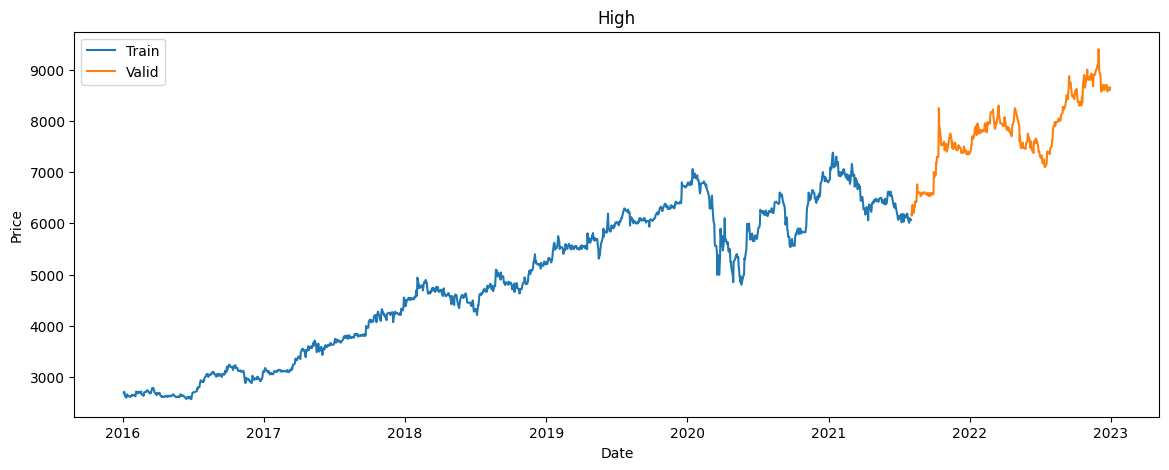

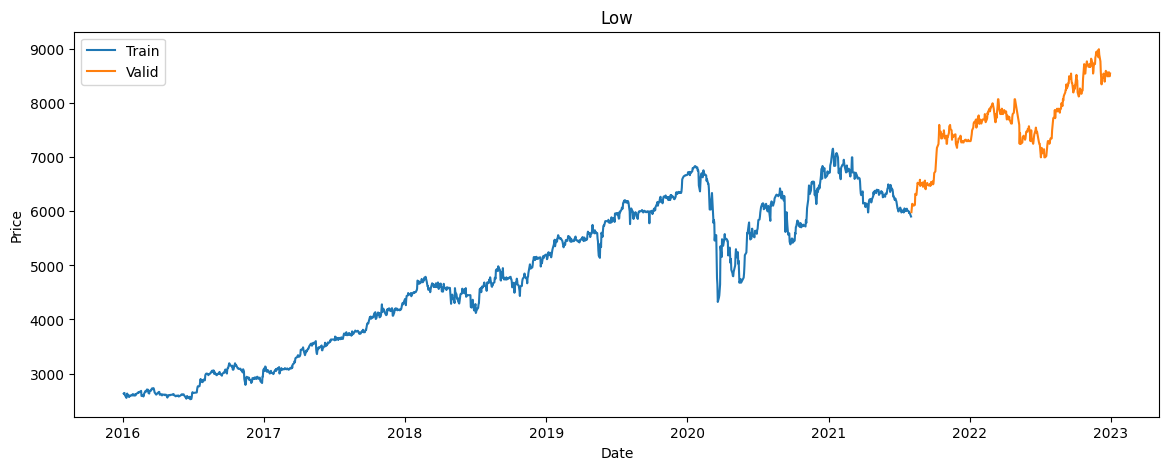

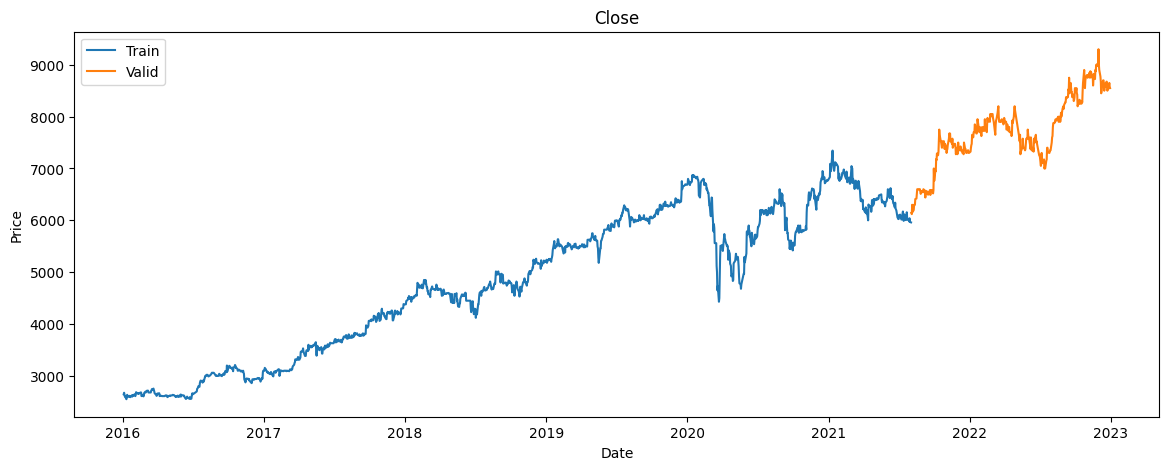

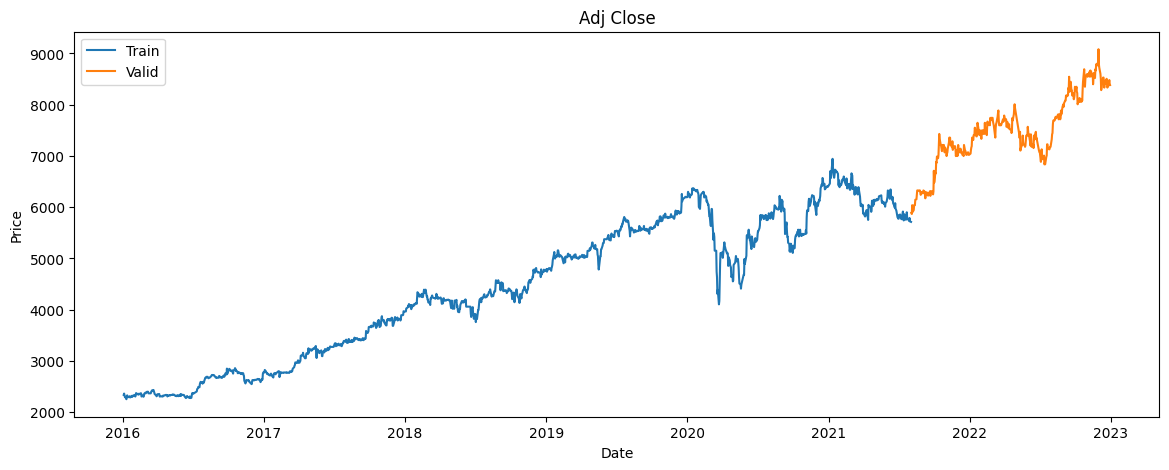

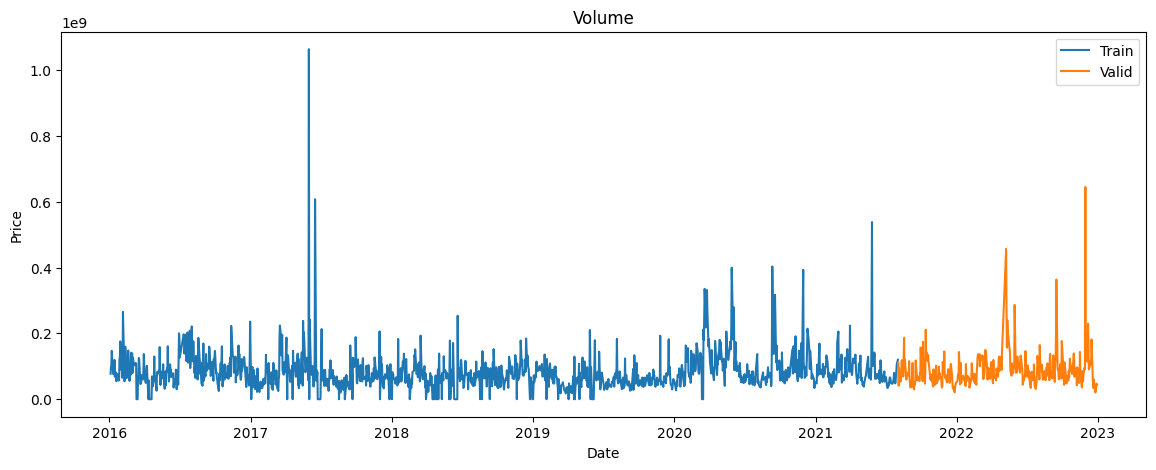

In [10]:
# Plot the training and validation set
for i in range(len(df.columns)):
    plt.figure(figsize=(14, 5))
    plt.plot(train[df.columns[i]])
    plt.plot(valid[df.columns[i]])
    plt.title(df.columns[i])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(['Train', 'Valid'])
    plt.show()

# Scaling

In [11]:
# drop all columns except 'Close'
train = train.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
valid = valid.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [12]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_valid = scaler.transform(valid)

# Generator Data

In [13]:
# Time series generator
train_generator = keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length=5, batch_size=1)
valid_generator = keras.preprocessing.sequence.TimeseriesGenerator(scaled_valid, scaled_valid, length=5, batch_size=1)

In [14]:
# Check the train generator
train_generator[0]

(array([[[0.0198123 ],
         [0.02606882],
         [0.01876955],
         [0.01042753],
         [0.01042753]]]),
 array([[0.]]))

# Modelling

## LSTM

In [15]:
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="LSTM.h5", save_best_only=True, monitor="val_mse", mode="min", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_mse", mode="min", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [16]:
# LSTM model
LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(5, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

# Compile the model
LSTM_model.compile(loss=tf.keras.losses.Huber(), optimizer="adam", metrics=["mse", "mae"])

# Model summary
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit the model
LSTM_history = LSTM_model.fit(train_generator, epochs=100, callbacks=callbacks, validation_data=valid_generator)

Epoch 1/100
1396/1398 [============================>.] - ETA: 0s - loss: 0.0014 - mse: 0.0029 - mae: 0.0301
Epoch 1: val_mse improved from inf to 0.00234, saving model to LSTM.h5
1398/1398 [==============================] - 15s 8ms/step - loss: 0.0014 - mse: 0.0028 - mae: 0.0301 - val_loss: 0.0012 - val_mse: 0.0023 - val_mae: 0.0391 - lr: 0.0010
Epoch 2/100
1395/1398 [============================>.] - ETA: 0s - loss: 5.3593e-04 - mse: 0.0011 - mae: 0.0235
Epoch 2: val_mse did not improve from 0.00234
1398/1398 [==============================] - 11s 8ms/step - loss: 5.3525e-04 - mse: 0.0011 - mae: 0.0235 - val_loss: 0.0018 - val_mse: 0.0036 - val_mae: 0.0499 - lr: 0.0010
Epoch 3/100
1395/1398 [============================>.] - ETA: 0s - loss: 4.6256e-04 - mse: 9.2512e-04 - mae: 0.0217
Epoch 3: val_mse did not improve from 0.00234
1398/1398 [==============================] - 10s 7ms/step - loss: 4.6185e-04 - mse: 9.2370e-04 - mae: 0.0216 - val_loss: 0.0043 - val_mse: 0.0087 - val_mae: 0.

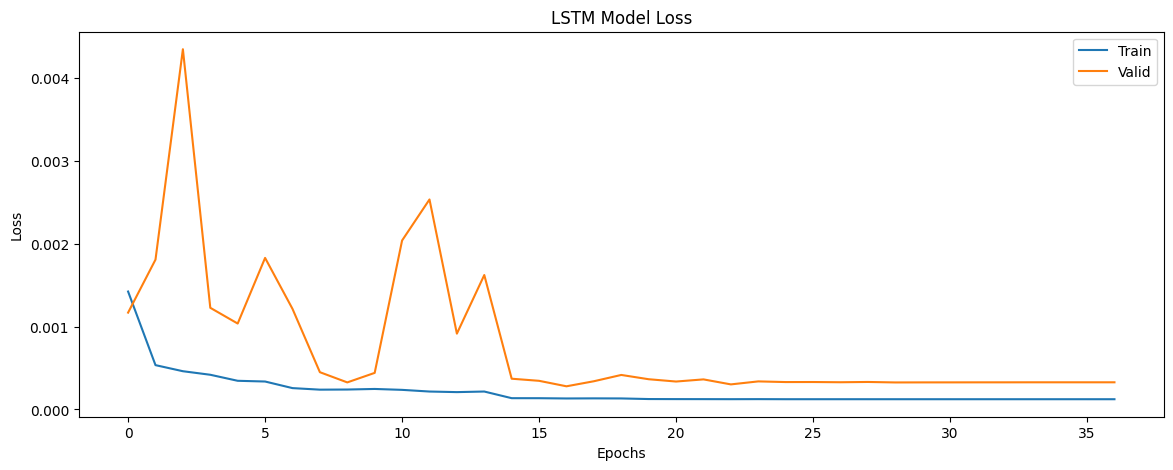

In [18]:
# Plot the loss train and validation
plt.figure(figsize=(14, 5))
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

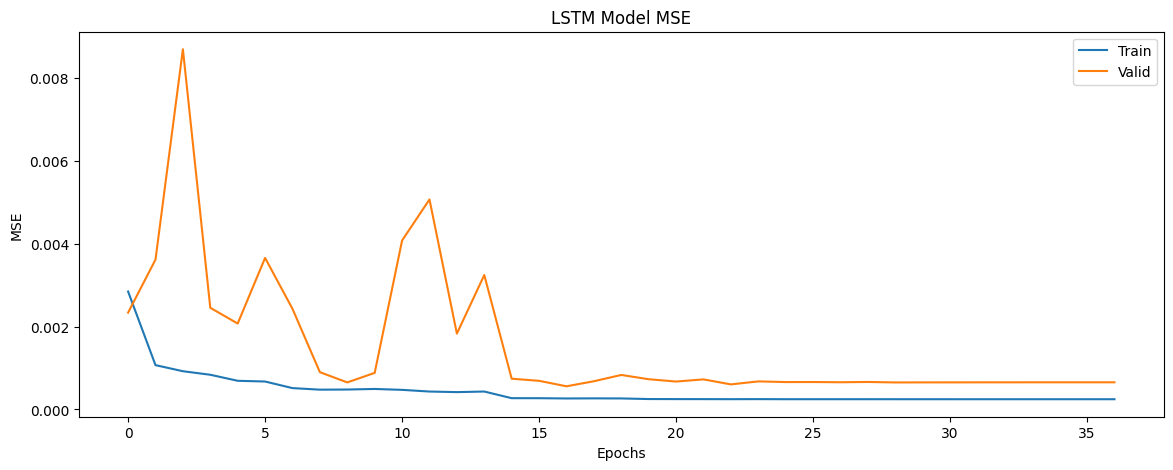

In [19]:
# Plot the mse train and validation
plt.figure(figsize=(14, 5))
plt.plot(LSTM_history.history['mse'])
plt.plot(LSTM_history.history['val_mse'])
plt.title('LSTM Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train', 'Valid'])
plt.show()

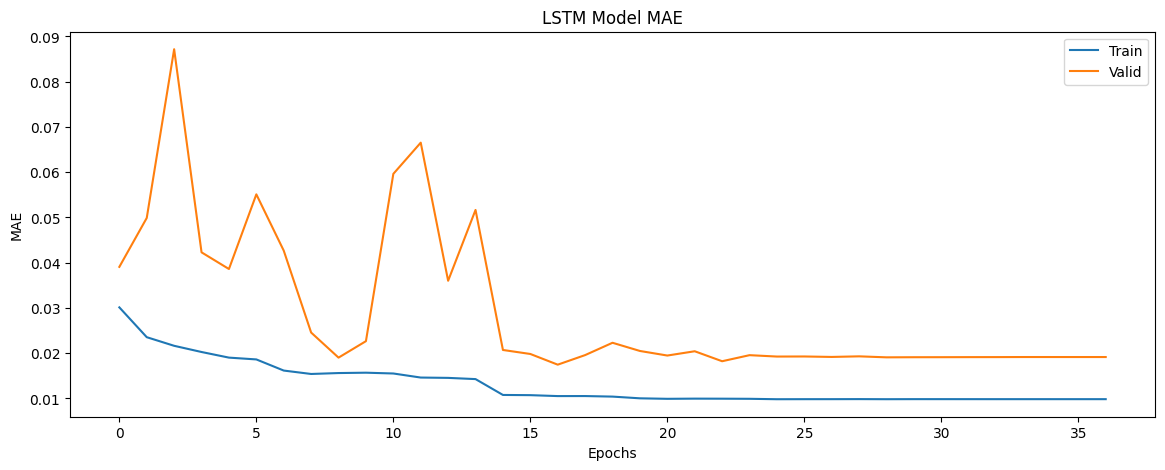

In [20]:
# Plot the mae train and validation
plt.figure(figsize=(14, 5))
plt.plot(LSTM_history.history['mae'])
plt.plot(LSTM_history.history['val_mae'])
plt.title('LSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['Train', 'Valid'])
plt.show()

## Bidirectional LSTM

In [21]:
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Bi-LSTM.h5", save_best_only=True, monitor="mse", mode="min", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="mse", mode="min", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [22]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Bi-LSTM + Lambda Layer model
Bi_LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(5,1,1))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1),
])

# Compile the model
Bi_LSTM_model.compile(loss=tf.keras.losses.Huber(), optimizer="adam", metrics=["mse", "mae"])
Bi_LSTM_model.build(input_shape=(5,1,1))

# Model summary
Bi_LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (5, 1, 128)              33792     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (5, 128)                 98816     
 nal)                                                            
                                                                 
 dense (Dense)               (5, 1)                    129       
                                                                 
Total params: 132,737
Trainable params: 132,737
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Fit the model
Bi_LSTM_history = Bi_LSTM_model.fit(train_generator, epochs=100, callbacks=callbacks, validation_data=valid_generator)

Epoch 1/100
1397/1398 [============================>.] - ETA: 0s - loss: 9.1388e-04 - mse: 0.0018 - mae: 0.0274
Epoch 1: mse improved from inf to 0.00183, saving model to Bi-LSTM.h5
1398/1398 [==============================] - 22s 12ms/step - loss: 9.1411e-04 - mse: 0.0018 - mae: 0.0274 - val_loss: 0.0022 - val_mse: 0.0043 - val_mae: 0.0582 - lr: 0.0010
Epoch 2/100
1394/1398 [============================>.] - ETA: 0s - loss: 4.6744e-04 - mse: 9.3488e-04 - mae: 0.0220
Epoch 2: mse improved from 0.00183 to 0.00093, saving model to Bi-LSTM.h5
1398/1398 [==============================] - 16s 11ms/step - loss: 4.6645e-04 - mse: 9.3289e-04 - mae: 0.0220 - val_loss: 4.3281e-04 - val_mse: 8.6563e-04 - val_mae: 0.0225 - lr: 0.0010
Epoch 3/100
1395/1398 [============================>.] - ETA: 0s - loss: 4.3990e-04 - mse: 8.7981e-04 - mae: 0.0209
Epoch 3: mse improved from 0.00093 to 0.00088, saving model to Bi-LSTM.h5
1398/1398 [==============================] - 16s 11ms/step - loss: 4.3955e-04 

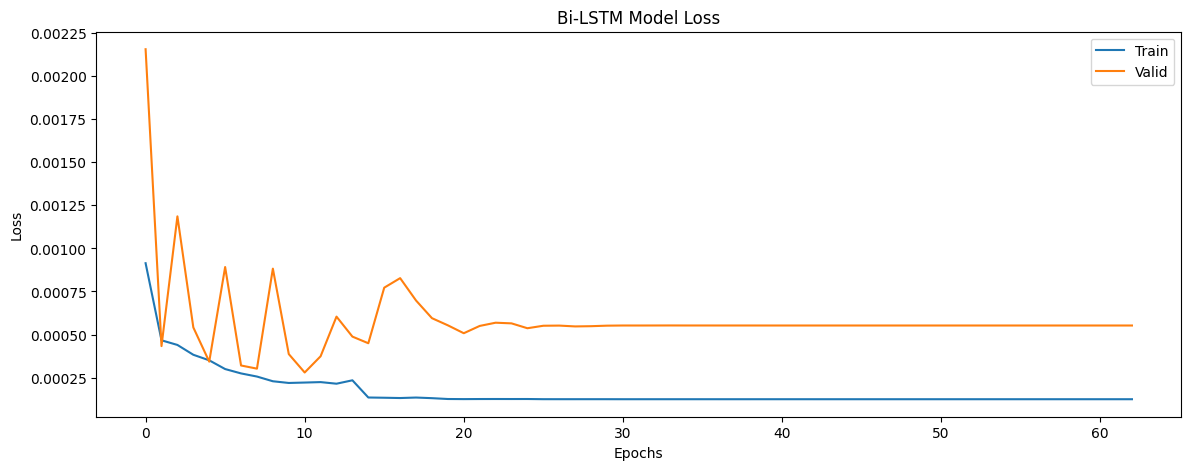

In [24]:
# Plot the loss train and validation
plt.figure(figsize=(14, 5))
plt.plot(Bi_LSTM_history.history['loss'])
plt.plot(Bi_LSTM_history.history['val_loss'])
plt.title('Bi-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

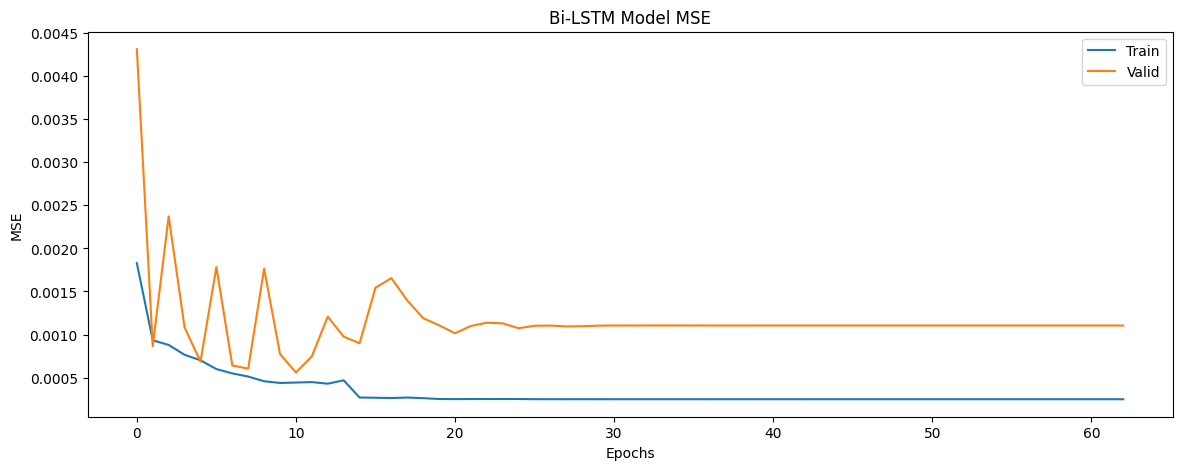

In [25]:
# Plot the mse train and validation
plt.figure(figsize=(14, 5))
plt.plot(Bi_LSTM_history.history['mse'])
plt.plot(Bi_LSTM_history.history['val_mse'])
plt.title('Bi-LSTM Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train', 'Valid'])
plt.show()

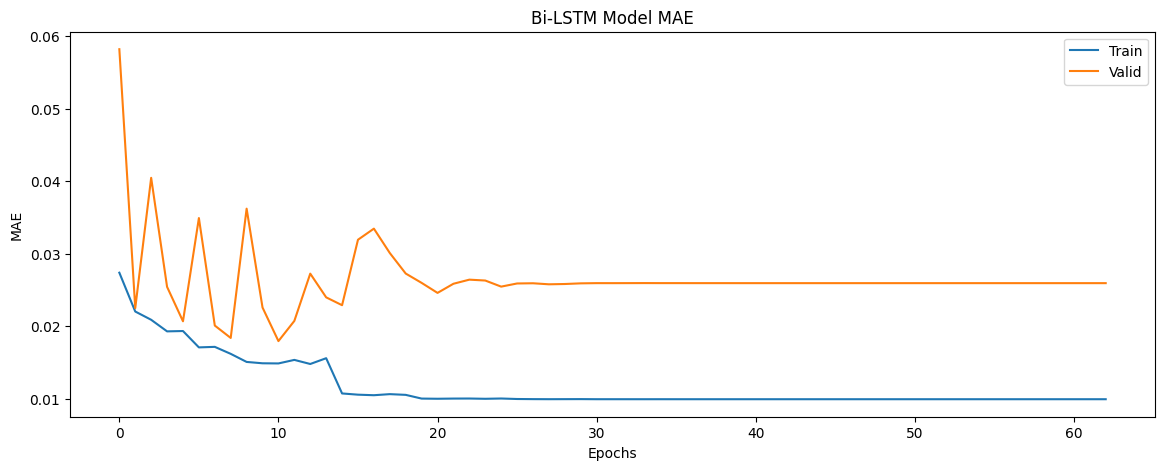

In [26]:
# Plot the mae train and validation
plt.figure(figsize=(14, 5))
plt.plot(Bi_LSTM_history.history['mae'])
plt.plot(Bi_LSTM_history.history['val_mae'])
plt.title('Bi-LSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['Train', 'Valid'])
plt.show()

# Model Evaluation

## LSTM

346/346 [==============================] - 2s 3ms/step


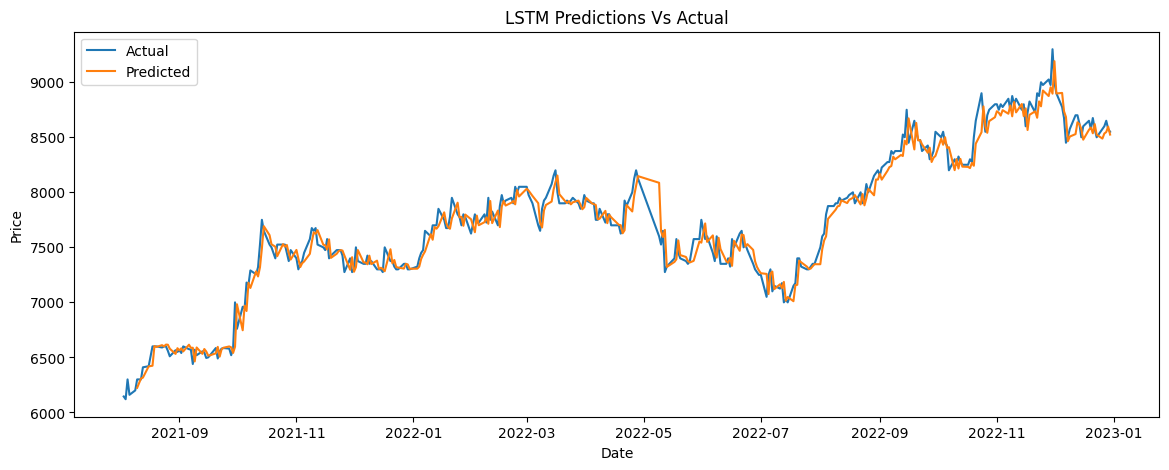

In [42]:
# Make predictions
LSTM_predictions = LSTM_model.predict(valid_generator)

# Inverse transform the predictions
LSTM_predictions = scaler.inverse_transform(LSTM_predictions)

# Add the predictions to the valid dataframe with first 5 rows as NaN
valid['LSTM Predictions'] = np.nan
valid.iloc[5:, 1] = LSTM_predictions[:, 0]

# Plot the predictions
plt.figure(figsize=(14, 5))
plt.plot(valid['Close'])
plt.plot(valid['LSTM Predictions'])
plt.title('LSTM Predictions Vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Actual', 'Predicted'])

In [43]:
# calculate the mae excluding the first five NaN values
MAE = mean_absolute_error(valid['Close'][5:], valid['LSTM Predictions'][5:])
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 83.72278467079119


## Bi LSTM

346/346 [==============================] - 2s 5ms/step


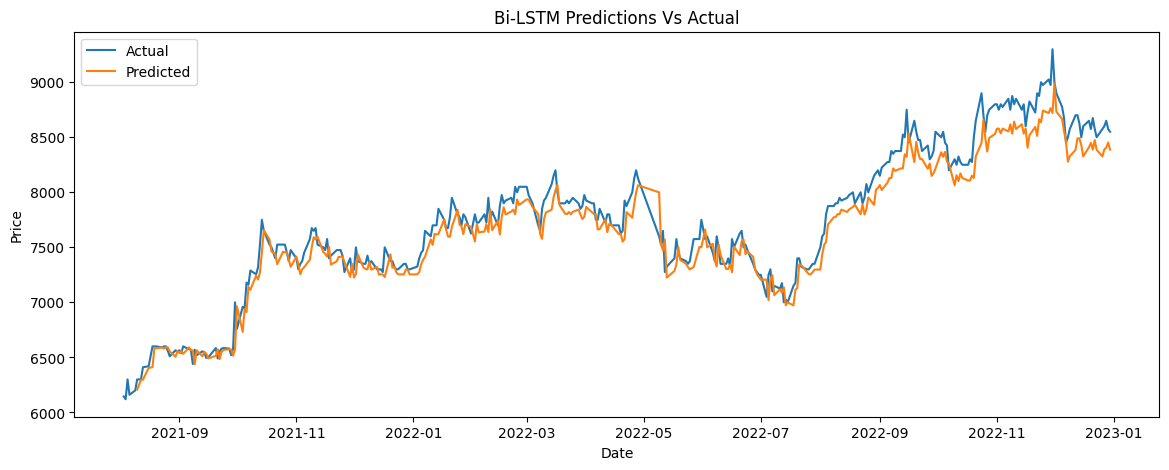

In [44]:
# Make predictions
Bi_LSTM_predictions = Bi_LSTM_model.predict(valid_generator)

# Inverse transform the predictions
Bi_LSTM_predictions = scaler.inverse_transform(Bi_LSTM_predictions)

# Add the predictions to the valid dataframe with first 5 rows as NaN
valid['Bi-LSTM Predictions'] = np.nan
valid.iloc[5:, 2] = Bi_LSTM_predictions[:, 0]

# Plot the predictions
plt.figure(figsize=(14, 5))
plt.plot(valid['Close'])
plt.plot(valid['Bi-LSTM Predictions'])
plt.title('Bi-LSTM Predictions Vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Actual', 'Predicted'])

In [45]:
# calculate the mae excluding the first five NaN values
MAE = mean_absolute_error(valid['Close'][5:], valid['Bi-LSTM Predictions'][5:])
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 124.34370484104046


# Make Prediction

In [46]:
# Declare the number of days to forecast
forecast_days = 20

# Take the last 5 rows of data 
last_days = scaled_valid[-5:]
last_days

array([[1.25651721],
       [1.26173097],
       [1.2721585 ],
       [1.25651721],
       [1.25130344]])

In [47]:
# Make empty array to store predictions
Forecast = []

# Forecasting 
for i in range(forecast_days):
    # Take the last 5 rows of data and reshape it to (1, 5, 1)
    input_sequence = last_days.reshape(1, 5, 1)
    # Get the predicted scaled price
    pred_price = LSTM_model.predict(input_sequence)
    # Append the predicted price to forecast
    Forecast = np.append(Forecast, pred_price)
    # Update the last sequence by removing the oldest observation and appending the forecast
    last_days = np.append(last_days[1:], pred_price, axis=0)

# Inverse transform the predicted price
forecast = scaler.inverse_transform(Forecast.reshape(-1, 1))
# print the forecast
print("\n")
print("=======================================")
for i in range(len(forecast)):
    print("Day", i+1, ":", forecast[i][0])

1/1 [==============================] - 0s 15ms/step


Day 1 : 8518.500907421112
Day 2 : 8485.643705129623
Day 3 : 8461.926523447037
Day 4 : 8436.192135214806
Day 5 : 8407.739748358727
Day 6 : 8381.542357206345
Day 7 : 8354.122295379639
Day 8 : 8331.852998137474
Day 9 : 8308.535370826721
Day 10 : 8285.89452803135
Day 11 : 8263.038188815117
Day 12 : 8241.079275012016
Day 13 : 8218.213218450546
Day 14 : 8195.988506674767
Day 15 : 8177.648446559906
Day 16 : 8158.38009417057
Day 17 : 8140.811133980751
Day 18 : 8122.519660592079
Day 19 : 8104.411101937294
Day 20 : 8085.960721373558


In [48]:
# last index of the valid dataframe
last_index = valid.index[-1]
last_index

Timestamp('2022-12-30 00:00:00')

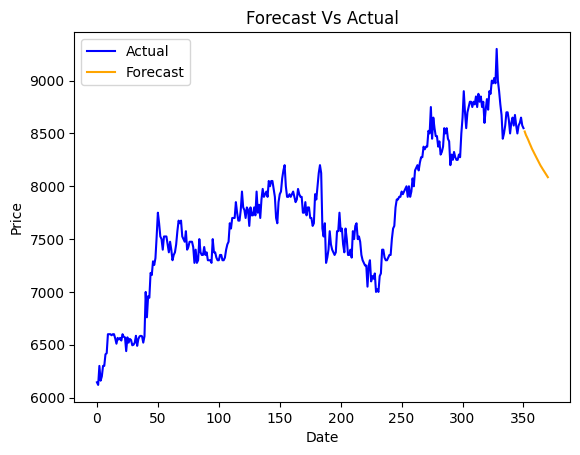

In [49]:
# Plot the forecast next to the actual price
# Plot the actual values
plt.plot(valid['Close'].values, color='blue', label='Actual')
# Start from where the actual price ends and plot the forecast
forecast_start = len(valid)
forecast_end = forecast_start + forecast_days
forecast_values = range(forecast_start, forecast_end)

# Plot the forecast
plt.plot(forecast_values, forecast, color='orange',label='Forecast')
plt.title('Forecast Vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Actual', 'Forecast'])

# show the plot
plt.show()